In [1]:
import os
import sys
nb_dir = os.path.split(os.getcwd())[0]
if nb_dir not in sys.path:
    sys.path.append(nb_dir)

import pandas as pd
import util.utilities as util
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter

# 1. Dataset

In [2]:
# Import papers spreadsheet to dataset
df_sms_extraction = pd.read_excel('../../dataset/Extraction_form_basic.xlsx')
df_sms_extraction.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 57 entries, 0 to 56
Data columns (total 35 columns):
Paper Id                                                                                                      57 non-null int64
Citation                                                                                                      57 non-null object
Google Scholar                                                                                                46 non-null object
Year                                                                                                          57 non-null object
Authors                                                                                                       57 non-null object
Title                                                                                                         57 non-null object
Publication Year                                                                                              57 non-null in

In [3]:
impotant_columns = ['Paper Id', 'Citation', 'Title','Q1 Type of ATD (Based on Li et al 2015)', 'Q2(Measure)', 'Q3(Monitoring)', 'Q4(Techniques and tools)', 'Q5(calculate the cost)', 'Q7 Research Type (Evaluation Research, Validation Research, Solution Proposal, Philosophycal paper, Other)', 'Method of research (Case study, Survey, Interview, Experiment, Observation)','Limitations', 'Future Works']

df_sms_extraction[impotant_columns].head(3)

,Paper Id,Citation,Title,Q1 Type of ATD (Based on Li et al 2015),Q2(Measure),Q3(Monitoring),Q4(Techniques and tools),Q5(calculate the cost),"Q7 Research Type (Evaluation Research, Validation Research, Solution Proposal, Philosophycal paper, Other)","Method of research (Case study, Survey, Interview, Experiment, Observation)",Limitations,Future Works
0,1,Perez et al. 2019,A Proposed Model-driven Approach to Manage Arc...,Not specified,REBEL focuses on finding ATD items at architec...,The method performed a monitoring process for ...,"general:""Model-Driven Architecture Approach, N...",Yes. The amount of architectural decisions imp...,Evaluation research,"Case study, expert opinion, observation",In this research we faced several challenges t...,Future work will include convolutional neural ...
1,2,Martini et al 2017,A semi-automated framework for the identificat...,Complex architectural behavioral dependencies,Complexity measures of files,The framework performed a monitoring process f...,"general:""specialist technical evaluation, modu...",Developer Work Months (DWM). DWM is defined in...,Evaluation research,"Case study, expert opinion",To estimate the effort to fix the ATD is neces...,No
2,3,Roveda et al. 2018,Towards an Architectural Debt Index,Architecture Smells,It was defined a formula to calculate ATD inde...,The method performed a monitoring for each ver...,"general:""architecture smells, modularity""\n# \...",No,Validation Research,survey,The data validation should be performed in a r...,The authors would also like to detect differen...


In [4]:
c_citation = 'Citation'
c_title = 'Title'
cq1 = 'Q1 Type of ATD (Based on Li et al 2015)'
cq2 = 'Q2(Measure)'
cq3 = 'Q3(Monitoring)'
cq4 = 'Q4(Techniques and tools)'                                                                                    
cq5 = 'Q5(calculate the cost)'                                                                                      
cq6 = 'Q6(How ATD is management?)'
cq7 = 'Q7 Research Type (Evaluation Research, Validation Research, Solution Proposal, Philosophycal paper, Other)'

questions_columns = [c_citation, c_title, cq1, cq2, cq3, cq4, cq5, cq7]
df_sms_extraction[questions_columns].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 57 entries, 0 to 56
Data columns (total 8 columns):
Citation                                                                                                      57 non-null object
Title                                                                                                         57 non-null object
Q1 Type of ATD (Based on Li et al 2015)                                                                       57 non-null object
Q2(Measure)                                                                                                   57 non-null object
Q3(Monitoring)                                                                                                57 non-null object
Q4(Techniques and tools)                                                                                      57 non-null object
Q5(calculate the cost)                                                                                        57 non-null ob

## List of Most import papers according Armando Sousa

In [5]:
list_id_main_papers = [1,2,4,5,9,10,21,22,27,48,33,31,81]
print('Amount of important papers: {}'.format(len(list_id_main_papers)))
df_sms_extraction[questions_columns][df_sms_extraction['Paper Id'].isin(list_id_main_papers)]

Amount of important papers: 13


,Citation,Title,Q1 Type of ATD (Based on Li et al 2015),Q2(Measure),Q3(Monitoring),Q4(Techniques and tools),Q5(calculate the cost),"Q7 Research Type (Evaluation Research, Validation Research, Solution Proposal, Philosophycal paper, Other)"
0,Perez et al. 2019,A Proposed Model-driven Approach to Manage Arc...,Not specified,REBEL focuses on finding ATD items at architec...,The method performed a monitoring process for ...,"general:""Model-Driven Architecture Approach, N...",Yes. The amount of architectural decisions imp...,Evaluation research
1,Martini et al 2017,A semi-automated framework for the identificat...,Complex architectural behavioral dependencies,Complexity measures of files,The framework performed a monitoring process f...,"general:""specialist technical evaluation, modu...",Developer Work Months (DWM). DWM is defined in...,Evaluation research
3,Snipes et al. 2018,A Case Study of the Effects of Architecture De...,Complex architectural behavioral dependencies,Architectural Root,The case study performed a set of evaluations ...,"general:""architectural root, source code, revi...",The method proposed can calculate the expected...,Evaluation research
4,Nayebi et al. 2019,A Longitudinal Study of Identifying and Paying...,Complex architectural behavioral dependencies,In this study we measured architecture debt in...,"Yes, during two years the releases were monito...","general:""maintainability, architecture flaws, ...",The method proposed check the time effort refa...,Evaluation research
6,Li et al. 2014,An Empirical Investigation of Modularity Metr...,Architectural compliance issues,"Index of Package Changing Impact (IPCI), Inde...",The authors monitored the evolution of Indexes...,"general:""modularity, average number of modifie...",No. The method proposed just calculates the AT...,Validation Research
7,Martini et al. 2016,An Empirically Developed Method to Aid Decisio...,Architectural compliance issues,Principal and Interest of ATD. There is a se...,The Principal and Interest is analysed by Soft...,"general:""source code, software architecture do...",Using particular formulas created by AnaConDeb...,Evaluation research
13,Li et al. 2015,Architectural Technical Debt Identification ba...,Architectural compliance issues,ATD Itens based on templated suggested by auth...,The approach is performed for each release usi...,"general:""software architectural documentation...",For each ATD item is calculated principal and ...,Evaluation research
14,Martini et al. 2014,Architecture Technical Debt: Understanding Cau...,Architectural compliance issues,The authors proposed a crisis point based on A...,The ATD items are monitored during releaase pl...,"general:""Agile Software Development, Taxonomy...",The authors have been defined a crisis point o...,Evaluation research
15,Martini et al. 2016,Estimating and Quantifying the Benefits of Ref...,System-level structure quality issues,It is calculated the effort of modularization ...,It was applied the framework for each release ...,"general:""modularization, code churn, source c...",It is used a formula to calculate the effort i...,Evaluation research
18,Kazman et al. 2015,A Case Study in Locating the Architectural Roo...,System-level structure quality issues,Hotspot. Calculate a hotspot to detect problem...,The approach of DRSpace is performed for each ...,"general:""hotspot, refactoring, source code, r...",The Architectural Debt was quantified using Te...,Evaluation research


## 1.1 List of Analysed Papers

In [6]:
for item in zip(list(df_sms_extraction['Citation']), list(df_sms_extraction['Title'])):
    citation = item[0]
    title = ' '.join(item[1].split())
    print('({}, {})'.format(citation, title))

(Perez et al. 2019, A Proposed Model-driven Approach to Manage Architectural Technical Debt Life Cycle)
(Martini et al 2017, A semi-automated framework for the identification and estimation of Architectural Technical Debt: A comparative case-study on the modularization of a software component)
(Roveda et al. 2018, Towards an Architectural Debt Index)
(Snipes et al. 2018, A Case Study of the Effects of Architecture Debt on Software Evolution Effort)
(Nayebi et al. 2019, A Longitudinal Study of Identifying and Paying Down architecture debt)
(Feng et al. 2019, Active Hotspot: An Issue-Oriented Model to Monitor Software Evolution and Degradation)
(Li et al. 2014, An Empirical Investigation of Modularity Metrics for Indicating architectural technical debt)
(Martini et al. 2016, An Empirically Developed Method to Aid Decisions on Architectural Technical Debt Refactoring: AnaConDebt)
(Xiao et al. 2016, Identifying and Quantifying Architectural Debt)
(Verdecchia 2018, Identifying Architectural

## 1.2 List of Authors

In [7]:
list_of_authors, list_of_uniques_authors = util.list_of_items(df_data=df_sms_extraction, column_name='Authors')


List of all 195 Authors : ['', '', 'A Tahmid', 'A. Nandakumar', 'Adam Trendowicz', 'Alan MacCormack', 'Albert Zündorf', 'Alexander Chatzigeorgiou', 'Alexander Chatzigeorgiou', 'Alexander Chatzigeorgiou', 'Alexander von Zitzewitz', 'Alexandra Szynkarski', 'Alfred Zimmermann', 'Alfred Zimmermann', 'Andrea Biaggi', 'Andrea Janes', 'Andriy Shapochka', 'Andrzej Zalewski', 'Angeliki Agathi Tsintzira', 'Antonela Tommasel', 'Antonio Martini', 'Antonio Martini', 'Antonio Martini', 'Antonio Martini', 'Antonio Martini', 'Antonio Martini', 'Antonio Martini', 'Antonio Martini', 'Antonio Martini', 'Antonio Martini', 'Antonio Martini', 'Antonio Martini', 'Antonio Martini', 'Antonio Martini', 'Antonio Martini', 'Apostolos Ampatzoglou', 'Apostolos Ampatzoglou', 'Apostolos Ampatzoglou', 'Apostolos Ampatzoglou', 'Areti Ampatzoglou', 'Arthur-Jozsef Molnar', 'Bento Siqueira', 'Bill Curtis', 'Boris Perez', 'Borja Fernandez‐Gauna', 'Chris Carlson', 'Claudia Raibulet', 'Claudia Raibulet1', 'Clemente Izurieta'

In [8]:
list_of_most_common_authors = Counter(list_of_authors).most_common()
print(list_of_most_common_authors)

[('Antonio Martini', 15), ('Francesca Arcelli Fontana', 7), ('Jan Bosch', 7), ('Rick Kazman', 7), ('Yuanfang Cai', 7), ('Paris Avgeriou', 5), ('Qiong Feng', 5), ('Apostolos Ampatzoglou', 4), ('Ran Mo', 4), ('Riccardo Roveda', 4), ('Alexander Chatzigeorgiou', 3), ('Lu Xiao', 3), ('Marco Zanoni', 3), ('', 2), ('Alfred Zimmermann', 2), ('Diomidis Spinellis', 2), ('Erik Sikander', 2), ('Ilaria Pigazzini', 2), ('Jonas Fritzsch', 2), ('Justus Bogner', 2), ('Michel Chaudron', 2), ('Niel Madlani', 2), ('Peng Liang', 2), ('Philippe Kruchten', 2), ('Roberto Verdecchia', 2), ('Stefan Wagner', 2), ('Terese Besker', 2), ('Zengyang Li', 2), ('A Tahmid', 1), ('A. Nandakumar', 1), ('Adam Trendowicz', 1), ('Alan MacCormack', 1), ('Albert Zündorf', 1), ('Alexander von Zitzewitz', 1), ('Alexandra Szynkarski', 1), ('Andrea Biaggi', 1), ('Andrea Janes', 1), ('Andriy Shapochka', 1), ('Andrzej Zalewski', 1), ('Angeliki Agathi Tsintzira', 1), ('Antonela Tommasel', 1), ('Areti Ampatzoglou', 1), ('Arthur-Jozsef

### Autores citados pelo menos 2 vezes

In [9]:
list_important_authors = list()
for each in list_of_most_common_authors:
    if (each[1] >= 2): 
        print(each)
        list_important_authors.append(each)

('Antonio Martini', 15)
('Francesca Arcelli Fontana', 7)
('Jan Bosch', 7)
('Rick Kazman', 7)
('Yuanfang Cai', 7)
('Paris Avgeriou', 5)
('Qiong Feng', 5)
('Apostolos Ampatzoglou', 4)
('Ran Mo', 4)
('Riccardo Roveda', 4)
('Alexander Chatzigeorgiou', 3)
('Lu Xiao', 3)
('Marco Zanoni', 3)
('', 2)
('Alfred Zimmermann', 2)
('Diomidis Spinellis', 2)
('Erik Sikander', 2)
('Ilaria Pigazzini', 2)
('Jonas Fritzsch', 2)
('Justus Bogner', 2)
('Michel Chaudron', 2)
('Niel Madlani', 2)
('Peng Liang', 2)
('Philippe Kruchten', 2)
('Roberto Verdecchia', 2)
('Stefan Wagner', 2)
('Terese Besker', 2)
('Zengyang Li', 2)


## 1.3 List of Key words

In [10]:
list_of_key_words, list_of_uniques_key_words = util.list_of_items(df_data=df_sms_extraction, column_name='Key words')

List of all 251 Key words : ['Agile software development', 'Android', 'Architectural Debt', 'Architectural Technical Debt', 'Architectural deb', 'Architectural debt', 'Architectural smells', 'Architectural smells', 'Architectural technical debt', 'Architectural technical debt', 'Architectural technical debt', 'Architectural technical debt', 'Architectural technical debt management', 'Architecture Design Decisions', 'Architecture Recovery', 'Architecture Technical Debt', 'Architecture assessment', 'Architecture debt', 'Architecture erosion', 'Architecture reconstruction', 'Architecture smells', 'Automotive engineering', 'Business', 'Causality', 'Cloud computing security', 'Code quality', 'Code smells', 'Code smells', 'Collocation', 'Complex systems', 'Compliance Checking', 'Computer architecture', 'Computer architecture', 'Computer architecture', 'Context', 'Correlation', 'Cost-benefit analysis', 'Criticality', 'Cross-company study', 'Data-Driven Development', 'Design', 'Design debt', '

In [11]:
# Normalize the key words to lower
list_temp = []
for each in list_of_key_words:
    list_temp.append(each.lower())
list_of_key_words = list_temp

# Sort keys words by frequency
list_of_most_common_key_words = Counter(list_of_key_words).most_common()
print(list_of_most_common_key_words)

[('technical debt', 22), ('software architecture', 17), ('architectural technical debt', 8), ('software quality', 5), ('architectural smells', 4), ('refactoring', 4), ('agile software development', 3), ('architectural debt', 3), ('code smells', 3), ('computer architecture', 3), ('maintainability', 3), ('qualitative model', 3), ('software evolution', 3), ('software maintenance', 3), ('software management', 3), ('survey', 3), ('architecture debt', 2), ('estimation', 2), ('grounded theory', 2), ('measurement', 2), ('modularization', 2), ('software life-cycle', 2), ('cohesion', 2), ('coupling', 2), ('industry', 2), ('android', 1), ('architectural deb', 1), ('architectural technical debt management', 1), ('architecture design decisions', 1), ('architecture recovery', 1), ('architecture technical debt', 1), ('architecture assessment', 1), ('architecture erosion', 1), ('architecture reconstruction', 1), ('architecture smells', 1), ('automotive engineering', 1), ('business', 1), ('causality', 

### Keywords citadas pelo menos 2 vezes

In [12]:
list_important_keyword = list()
for each in list_of_most_common_key_words:
    if (each[1] >= 2): 
        print(each)
        list_important_keyword.append(each)

('technical debt', 22)
('software architecture', 17)
('architectural technical debt', 8)
('software quality', 5)
('architectural smells', 4)
('refactoring', 4)
('agile software development', 3)
('architectural debt', 3)
('code smells', 3)
('computer architecture', 3)
('maintainability', 3)
('qualitative model', 3)
('software evolution', 3)
('software maintenance', 3)
('software management', 3)
('survey', 3)
('architecture debt', 2)
('estimation', 2)
('grounded theory', 2)
('measurement', 2)
('modularization', 2)
('software life-cycle', 2)
('cohesion', 2)
('coupling', 2)
('industry', 2)


## 1.4 List of Venues

In [13]:
list_of_venues = []
for item in list(df_sms_extraction['Name of Venue']): 
    item = ' '.join(item.split())
    list_of_venues.append(item)
list_of_venues.sort()

list_of_most_common_venues = Counter(list_of_venues).most_common()

for each in list_of_most_common_venues: 
    print(each)

('Euromicro Conference on Software Engineering and Advanced Applications', 7)
('International Conference on Technical Debt (TechDebt)', 7)
('European Conference on Software Architecture', 3)
('International Conference on Software Engineering', 3)
('International Workshop on Managing Technical Debt (MTD)', 3)
('International Conference on Software Maintenance and Evolution (ICSME)', 2)
('Journal of Software: Evolution and Process', 2)
('Asia Pacific Software Engineering Conference', 1)
('Conference on Software Achitecture', 1)
('Conference on Software Architecture and European Conference on Software Architecture', 1)
('EE Transactions on Software Engineering', 1)
('Empirical Software Engineering', 1)
('IEEE Software', 1)
('Information and Software Technology Journal', 1)
('International Conference on Agile Software Development', 1)
('International Conference on Automated Software Engineering (ASE)', 1)
('International Conference on Evaluation and Modeling Methods for Systems Analysis an

In [14]:
# List of venues cited more the 2 times
for each in list_of_most_common_venues: 
    if (each[1] >= 2):
        print(each)

('Euromicro Conference on Software Engineering and Advanced Applications', 7)
('International Conference on Technical Debt (TechDebt)', 7)
('European Conference on Software Architecture', 3)
('International Conference on Software Engineering', 3)
('International Workshop on Managing Technical Debt (MTD)', 3)
('International Conference on Software Maintenance and Evolution (ICSME)', 2)
('Journal of Software: Evolution and Process', 2)


## 1.5 Basic statistic

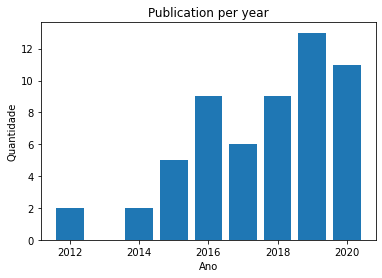

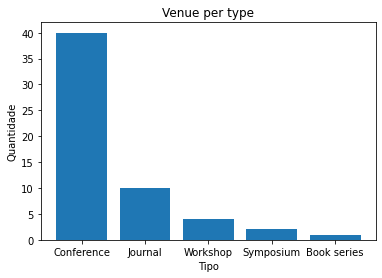

In [15]:
publication_per_year = dict(df_sms_extraction['Publication Year'].value_counts())
util.show_bar_plot_complete(publication_per_year, 'Publication per year', x_label='Ano', y_label='Quantidade')

venue_per_type = dict(df_sms_extraction['Venue Type'].value_counts())
util.show_bar_plot_complete(venue_per_type, 'Venue per type', x_label='Tipo', y_label='Quantidade')

In [16]:
print(publication_per_year)
print('---')

sum = 0 
for each in venue_per_type.items():
    sum = sum + each[1] 
print(sum)

list_of_venues_results = list()
for each in venue_per_type.items():
    elemento = (each, round(each[1]/sum,3))
    list_of_venues_results.append(elemento)

list_of_venues_results

{2019: 13, 2020: 11, 2018: 9, 2016: 9, 2017: 6, 2015: 5, 2014: 2, 2012: 2}
---
57


[(('Conference', 40), 0.702),
 (('Journal', 10), 0.175),
 (('Workshop', 4), 0.07),
 (('Symposium', 2), 0.035),
 (('Book series', 1), 0.018)]

### Petersen et al [1] proposed that the mapping study could provide good overview of area, to identify research gaps, visualization of research trends, related work identification, and validation of gathred references.

In [17]:
# overview of area

# identify research gaps

# visualization of research trends

#### [1] Petersen et al. 2015. "Guidelines for conducting systematic mapping studies in software engineering: An update"